In [ ]:
#@title Download libraries and data
%%capture
!pip install gdown
# character mappings
!gdown https://drive.google.com/uc?id=1vjj7DfT_T3c4q-18LNpo7YMcRCUnh7aF
!gdown https://drive.google.com/uc?id=10bXCFp7a7MyUFKR55rUeqWNrEe2300TP
#lexicon files
!gdown https://drive.google.com/uc?id=1IkeMeI9yuxBfjZOeND_aLlZj85LWvtG7
!gdown https://drive.google.com/uc?id=1jMYatmux39HWKo3Rw0CHxir3kG8_r3PE
# saved weights
!gdown https://drive.google.com/uc?id=11w1p8RVLml9cidMrkQpdo648pNPdQFxZ
!gdown https://drive.google.com/uc?id=16oasVsBExwHhCmYDSR1uhV10NiWYZ-OY

!git clone https://github.com/arshjot/ScrabbleGAN.git
%cd "/content/ScrabbleGAN"

In [ ]:
#@title Choose dataset

dataset = 'RIMES' #@param ["IAM", "RIMES"]

In [ ]:
# import required packages
from config import Config
import pickle as pkl
from generate_images import ImgGenerator
import matplotlib.pyplot as plt
import torch
import numpy as np

config = Config
config.dataset = dataset
config.lexicon_file = '/content/Lexique383.tsv' if dataset == 'RIMES' else '/content/words.txt'
config.num_chars = 74 if dataset == 'IAM' else 93

with open(f'/content/{dataset}_char_map.pkl', 'rb') as f:
   char_map = pkl.load(f)

generator = ImgGenerator(checkpt_path=f'/content/{dataset}_best_checkpoint.tar',
                         config=config, char_map=char_map)

Model: ScrabbleGAN
Param count for Gs initialized parameters: 26937217
Param count for Ds initialized parameters: 36383041


## Generate Random Images

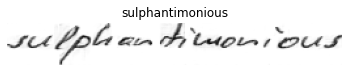

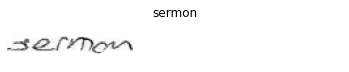

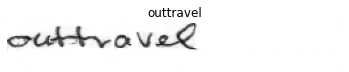

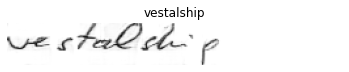

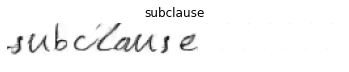

In [ ]:
num_imgs = 5
generated_imgs, _, word_labels = generator.generate(random_num_imgs=num_imgs)
for label, img in zip(word_labels, generated_imgs):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
    plt.show()

## Generate specific word images

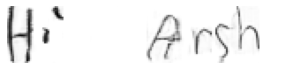

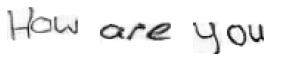

In [ ]:
sentences = [['Heyy', 'Arsh'], ['How', 'are', 'you']]
for word_list in sentences:
    generated_imgs, _, word_labels = generator.generate(word_list=word_list)
    sentence_img = []
    for label, img in zip(word_labels, generated_imgs):
        img = img[:, img.sum(0) < 31.5]
        sentence_img.append(img)
        sentence_img.append(np.ones((img.shape[0], 15)))
    sentence_img = np.hstack(sentence_img)
    plt.imshow(sentence_img, cmap='gray')
    plt.axis('off')
    plt.show()

## Generate images with a specific style

In [ ]:
z_dist = torch.distributions.Normal(loc=0, scale=1.)

In [ ]:
#@title Choose seed for specific style
noise_seed = 42 #@param {type:"slider", min:0, max:100, step:1}

torch.manual_seed(noise_seed)
z = z_dist.sample([128])

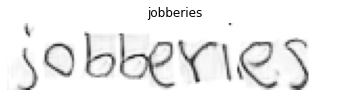

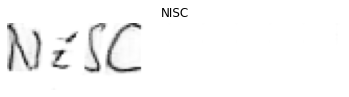

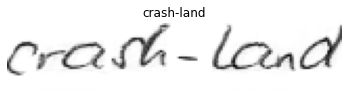

In [ ]:
# random words, same style
num_imgs = 3
generated_imgs, _, word_labels = generator.generate(random_num_imgs=num_imgs, z=z)
for label, img in zip(word_labels, generated_imgs):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
    plt.show()

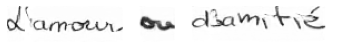

In [ ]:
# specific words, same style
sentences = ["d'amour ou d'amitié"]
for word_list in sentences:
    word_list = word_list.split(' ')
    generated_imgs, _, word_labels = generator.generate(word_list=word_list, z=z)
    sentence_img = []
    for label, img in zip(word_labels, generated_imgs):
        img = img[:, img.sum(0) < 31.5]
        sentence_img.append(img)
        sentence_img.append(np.ones((img.shape[0], 15)))
    sentence_img = np.hstack(sentence_img)
    plt.imshow(sentence_img, cmap='gray')
    plt.axis('off')
    plt.show()

### Same word, different styles

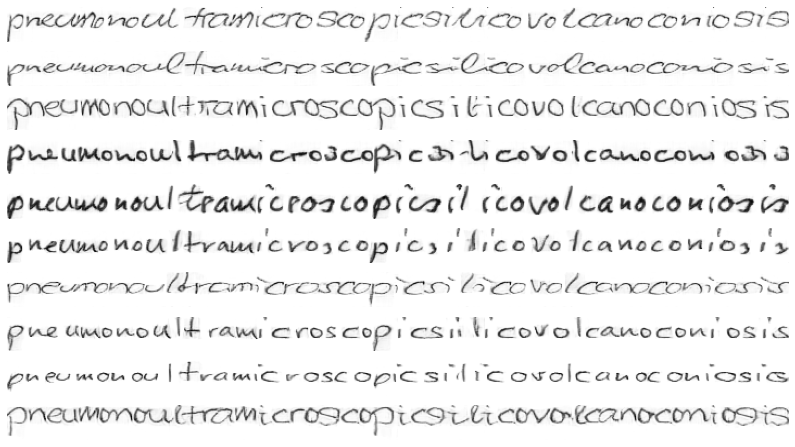

In [ ]:
word = 'pneumonoultramicroscopicsilicovolcanoconiosis'
num_samples = 10
generated_imgs, _, word_labels = generator.generate(word_list=[word] * num_samples)
columns = 1
rows = num_samples
fig=plt.figure(figsize=(14, 8))
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(generated_imgs[i-1], cmap='gray')
plt.show()

In [ ]:
#@title Same word, same style (choose seed)
noise_seed = 13 #@param {type:"slider", min:0, max:100, step:1}

torch.manual_seed(noise_seed)
z = z_dist.sample([128])

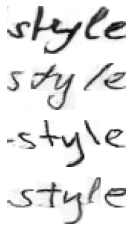

In [ ]:
word = 'style'
num_samples = 4
generated_imgs, _, word_labels = generator.generate(word_list=[word] * num_samples, z=z)
columns = 1
rows = num_samples
fig=plt.figure()
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(generated_imgs[i-1], cmap='gray')
plt.show()